In [1]:
import numpy as np
import scipy.ndimage
import edt
import matplotlib.pyplot as plt
from distance_transform import *

In [2]:
X = np.zeros((256, 256, 256), dtype=np.float32)
X[128:128+32,128:128+32,128:128+32] = 1

In [3]:
np.random.seed(42)
Y = np.random.rand(256, 256, 256)
Y = ((Y>0.5)*1.0).astype(np.float32)

In [4]:
def show_slice(img, s, vmin=-1, vmax=1):
    plt.imshow(np.expand_dims(img[s], -1), cmap='gray', vmin=vmin, vmax=vmax)

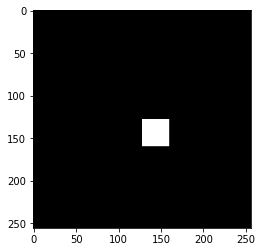

In [5]:
show_slice(X, 128, 0, 1)

In [6]:
A = label_dt(X, normalize=normalize_tanh)
B = label_dt(X, normalize=normalize_sign)
C = label_dt(X, normalize=normalize_linear_clip_0_1)

X_ = (scipy.ndimage.morphology.binary_dilation(X, scipy.ndimage.generate_binary_structure(3, 1), 8)*1.0).astype(np.float32)
D = label_dt(X_, normalize=normalize_linear_clip_0_1)

/home/cyril/Development/NeNISt/data/distance_transform.py:32: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-(distance/scale)))


In [7]:
A_ = label_dt(Y, normalize=normalize_tanh)
B_ = label_dt(Y, normalize=normalize_sign)
C_ = label_dt(Y, normalize=normalize_linear_clip_0_1)
(
((Y==1)==(A_>0)).all(),
((Y==1)==(B_>0.5)).all(),
((Y==1)==(C_>0.0)).all()
)

(True, True, True)

In [8]:
(
((X==1)==(A>0)).all(),
((X==1)==(B>0.5)).all(),
((X==1)==(C>0.0)).all()
)

(True, True, True)

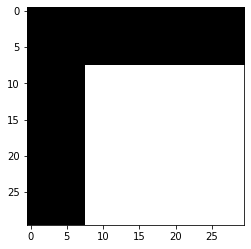

In [9]:
show_slice(X[:,120:150,120:150], 135, 0, 1)

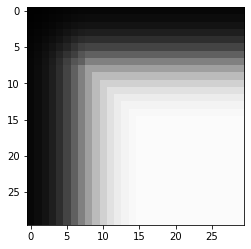

In [10]:
show_slice(A[:,120:150,120:150], 135, -1, 1)

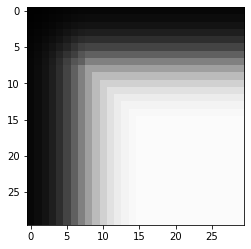

In [11]:
show_slice(B[:,120:150,120:150], 135, 0, 1)

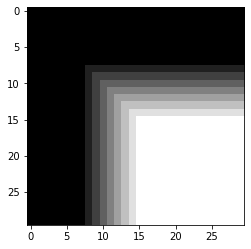

In [12]:
show_slice(C[:,120:150,120:150], 135, 0, 1)

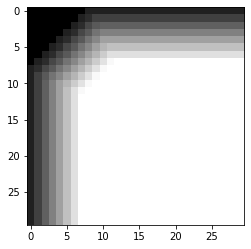

In [13]:
show_slice(D[:,120:150,120:150], 135, 0, 1)

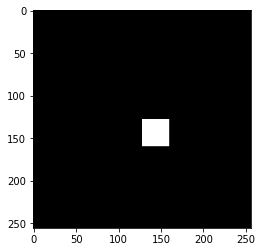

In [14]:
show_slice(X, 135, 0, 1)

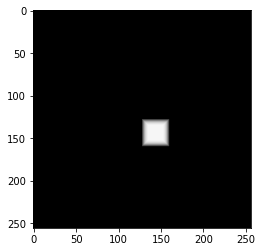

In [15]:
show_slice(A, 135, 0, 1)

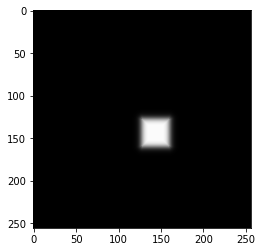

In [16]:
show_slice(B, 135, 0, 1)

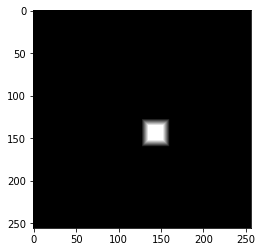

In [17]:
show_slice(C, 135, 0, 1)